In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

In [2]:
diabetes=pd.read_csv(r"C:\Users\DELL\Downloads\diabetes-dataset.csv")

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [6]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Exploratory Data Analysis

In [8]:
def group(age):
    if age>=40:
        return 'Old'
    else:
        return 'Young'
diabetes['Age_classification']=diabetes['Age'].apply(group)

In [9]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_classification
0,2,138,62,35,0,33.6,0.127,47,1,Old
1,0,84,82,31,125,38.2,0.233,23,0,Young
2,0,145,0,0,0,44.2,0.630,31,1,Young
3,0,135,68,42,250,42.3,0.365,24,1,Young
4,1,139,62,41,480,40.7,0.536,21,0,Young


In [10]:
diabetes.groupby('Age_classification').Outcome.value_counts()

Age_classification  Outcome
Old                 1           273
                    0           253
Young               0          1063
                    1           411
Name: Outcome, dtype: int64

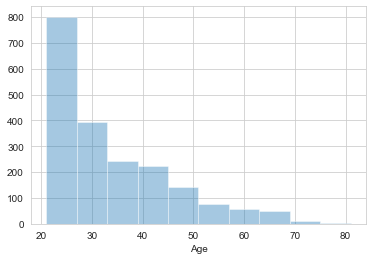

In [11]:
sns.set_style('whitegrid')
sns.distplot(diabetes['Age'],bins=10,kde=False)

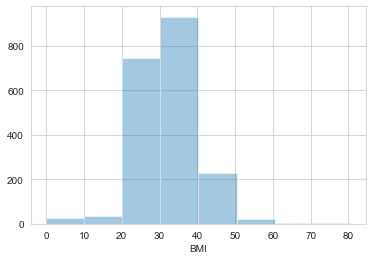

In [12]:
sns.distplot(diabetes['BMI'],bins=8,kde=False)

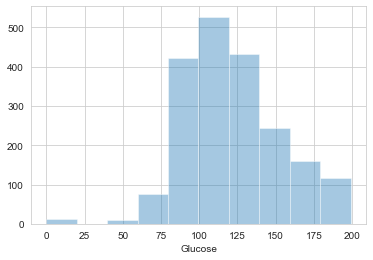

In [13]:
sns.distplot(diabetes['Glucose'],bins=10,kde=False)

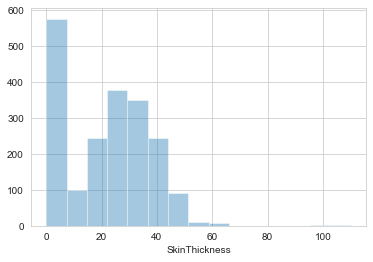

In [14]:
sns.distplot(diabetes['SkinThickness'],bins=15,kde=False)

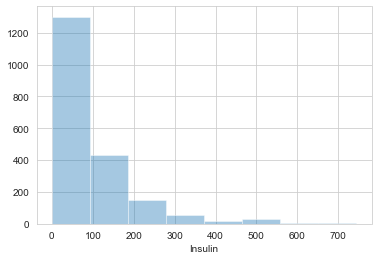

In [15]:
sns.distplot(diabetes['Insulin'],bins=8,kde=False)

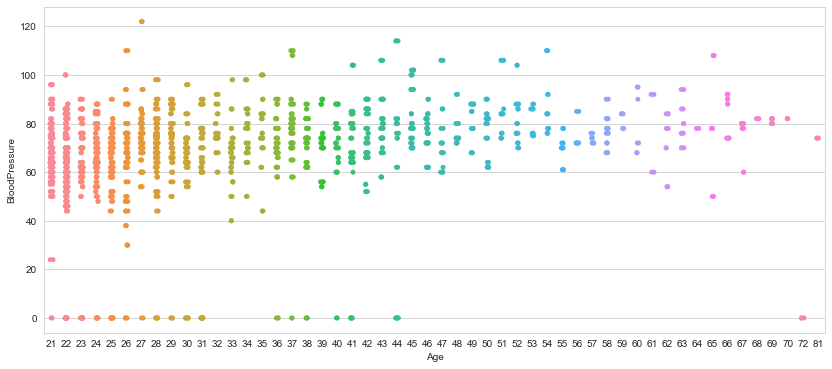

In [16]:
plt.figure(figsize=(14,6))
sns.stripplot(x='Age',y='BloodPressure',data=diabetes)

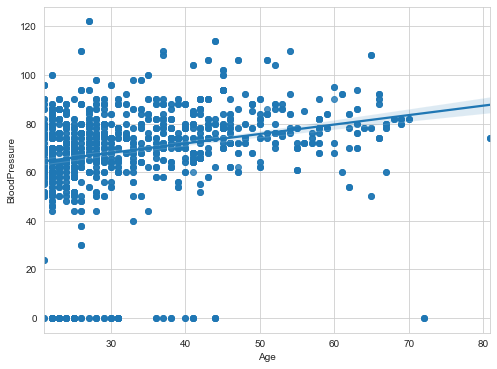

In [17]:
plt.figure(figsize=(8,6))
sns.regplot(x='Age',y='BloodPressure',data=diabetes)

Text(0, 0.5, 'Glucose')

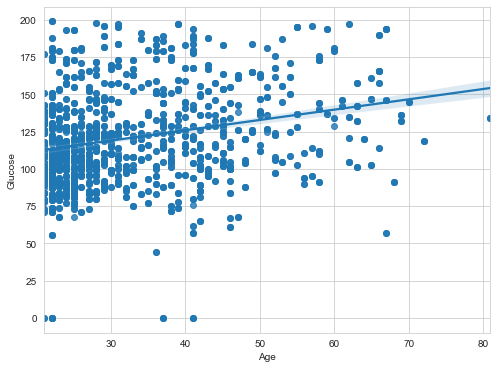

In [18]:
plt.figure(figsize=(8,6))
sns.regplot(x='Age',y='Glucose',data=diabetes)
plt.xlabel('Age')
plt.ylabel('Glucose')

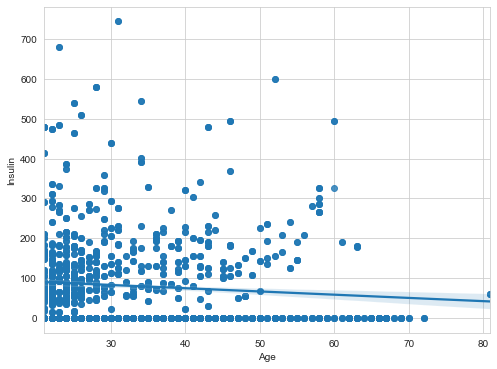

In [19]:
plt.figure(figsize=(8,6))
sns.regplot(x='Age',y='Insulin',data=diabetes)

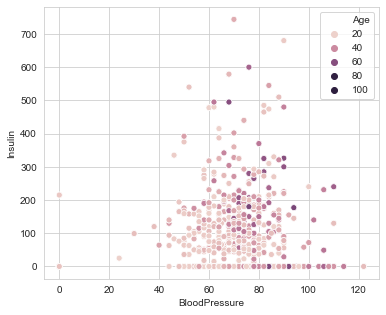

In [20]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='BloodPressure',y='Insulin',data=diabetes,hue='Age',cmap='viridis')

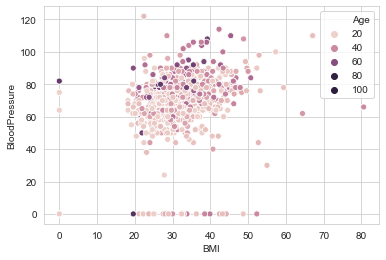

In [21]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='BMI',y='BloodPressure',data=diabetes,hue='Age',cmap='viridis')

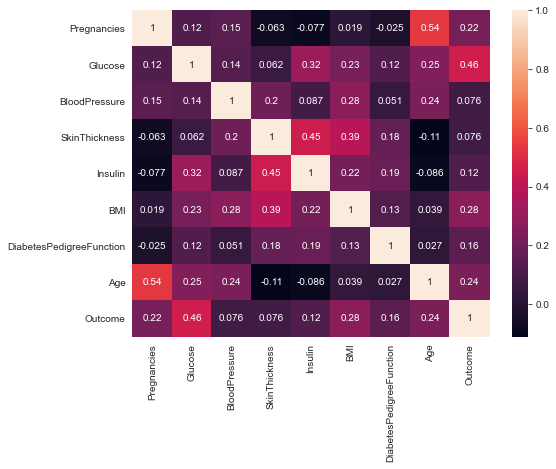

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(diabetes.corr(),annot=True)

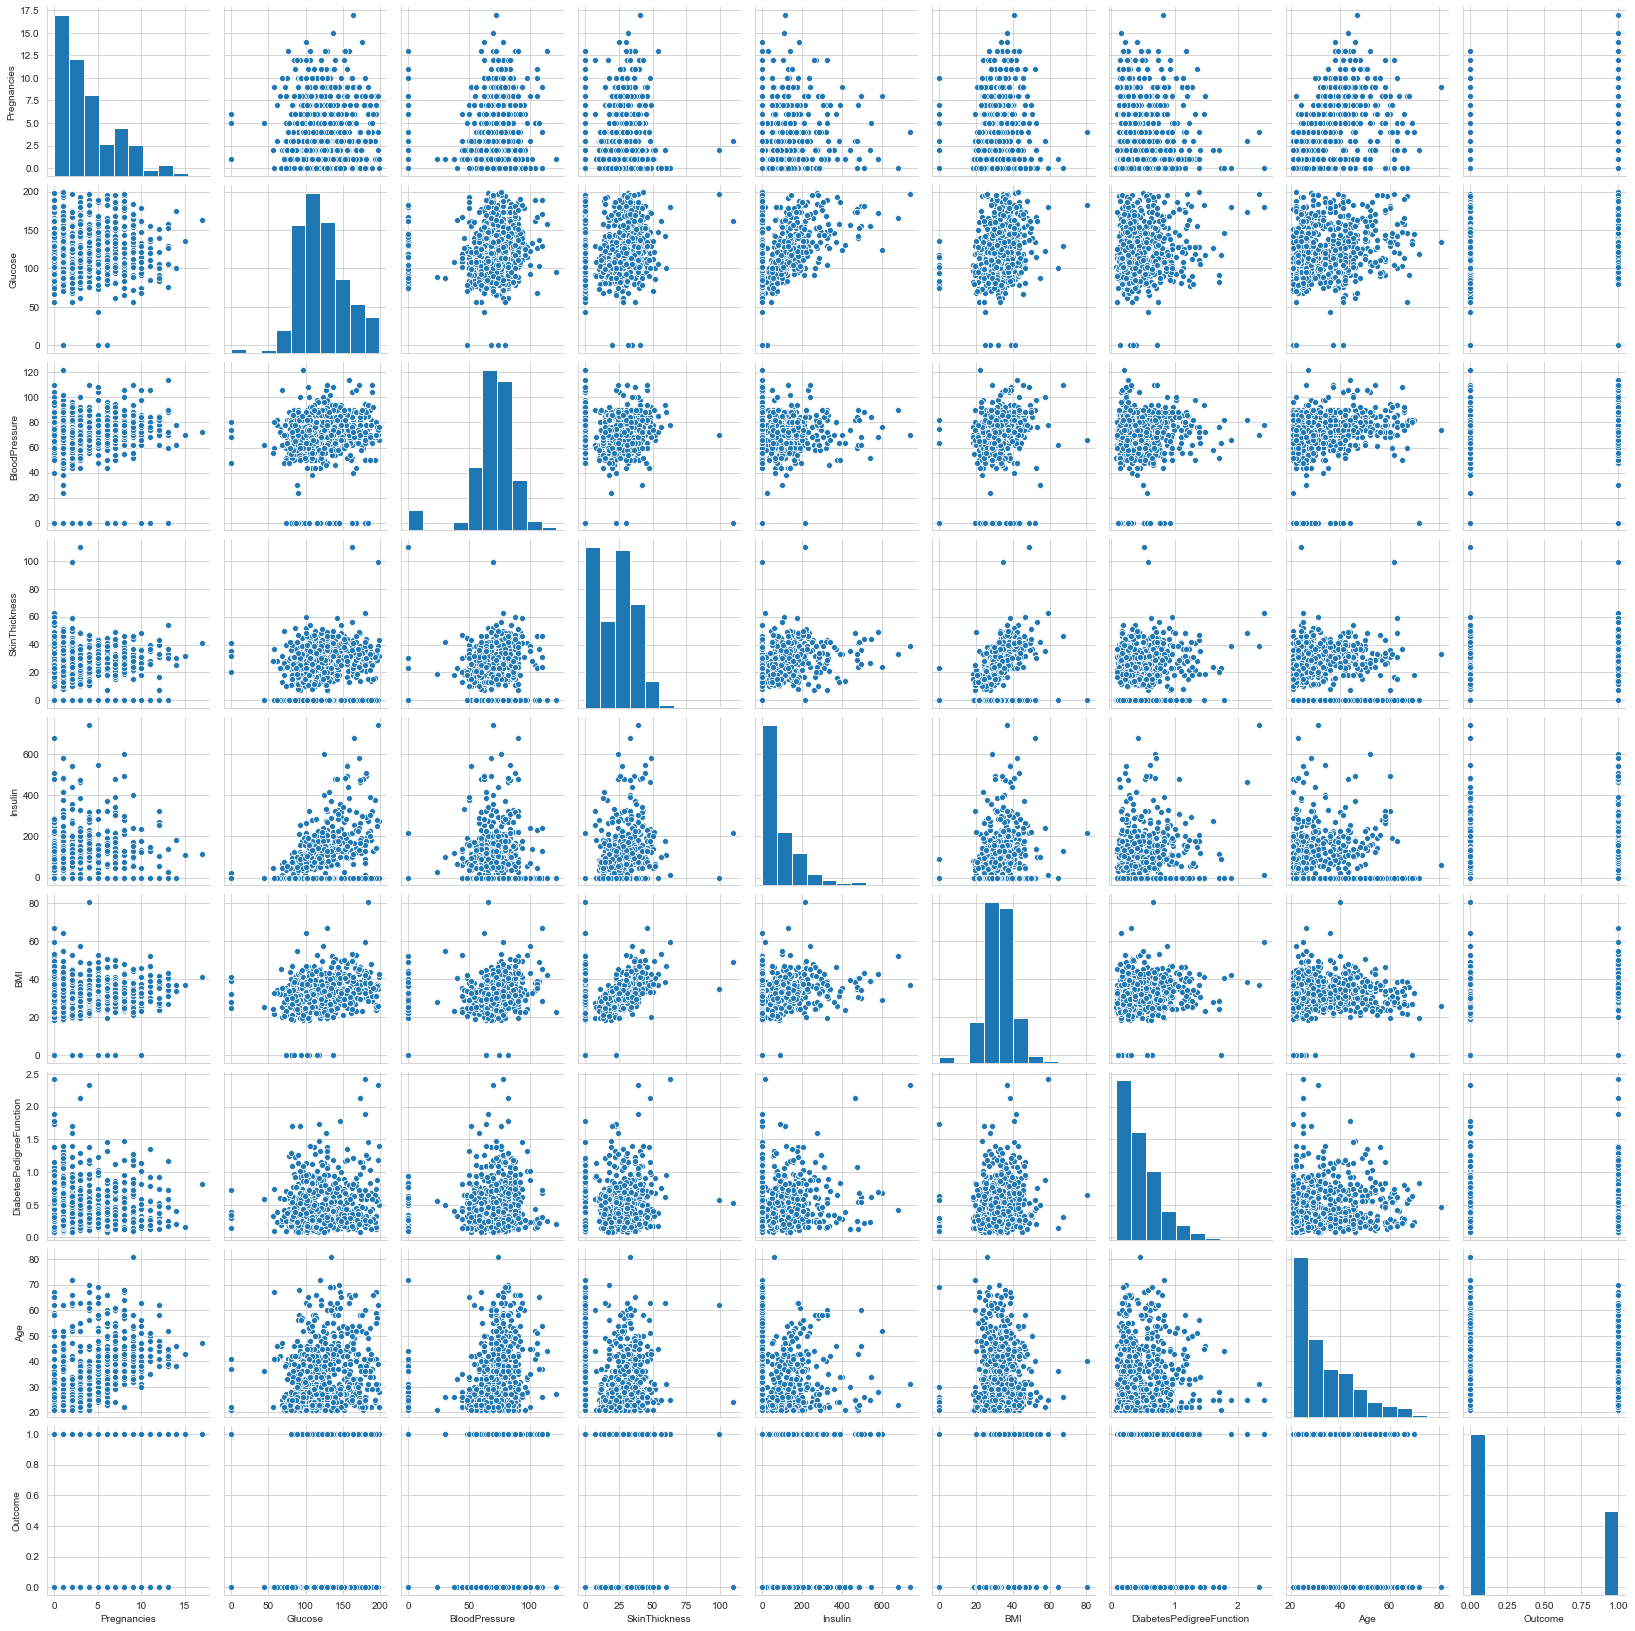

In [23]:
sns.pairplot(diabetes)

In [24]:
#Maximum number of people tested are from diabetes are in the age range 20-30.
#Maximum number of patients are in the age group >40 years.
#BMI of majority is in the range 30-40.
#Glucose level of most of the people tested is between 100-125.
#Skin thickness is less than or equal to 10
#Glucose level of maximum number of people tested is in the range 100-200.
#Insulin level of most of the people tested is in the range 0-100 (0 inclusive).

Applying ML Algorithm

In [25]:
diabetes.drop('Age_classification',axis=1,inplace=True)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()

In [28]:
scaler.fit(diabetes.drop('Outcome',axis=1))

StandardScaler()

In [29]:
scaled_feat=scaler.transform(diabetes.drop('Outcome',axis=1))

In [30]:
scaled_feat

array([[-0.5153943 ,  0.52455322, -0.37248123, ...,  0.17268332,
        -1.06324616,  1.18042417],
       [-1.12049474, -1.1597562 ,  0.67008046, ...,  0.73724853,
        -0.7355513 , -0.85632626],
       [-1.12049474,  0.74288962, -3.60442246, ...,  1.47363794,
         0.49175869, -0.17740945],
       ...,
       [ 0.69480658, -1.12856529,  0.46156812, ..., -0.12187245,
        -0.27492362,  0.75610116],
       [-1.12049474,  0.24383498,  2.12966682, ...,  4.28419085,
        -0.46968566, -0.60173245],
       [-0.5153943 , -1.25332895,  0.14879962, ..., -0.25687717,
         0.23516743, -0.68659705]])

In [31]:
diabetes_df=pd.DataFrame(scaled_feat,columns=diabetes.columns[0:8])

In [32]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.515394,0.524553,-0.372481,0.873645,-0.722016,0.172683,-1.063246,1.180424
1,-1.120495,-1.159756,0.670080,0.625186,0.402563,0.737249,-0.735551,-0.856326
2,-1.120495,0.742890,-3.604422,-1.300374,-0.722016,1.473638,0.491759,-0.177409
3,-1.120495,0.430980,-0.059713,1.308449,1.527142,1.240448,-0.327478,-0.771462
4,-0.817945,0.555744,-0.372481,1.246334,3.596367,1.044077,0.201161,-1.026055


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X=diabetes_df
y=diabetes['Outcome']

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
#To find the most apt value for k 
from sklearn.metrics import mean_squared_error

In [38]:
l=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i=knn.predict(X_test)
    accuracy=sklearn.metrics.accuracy_score(y_test,predict_i)
    l.append(accuracy)
print(l)

[0.95, 0.875, 0.835, 0.805, 0.7983333333333333, 0.78, 0.7816666666666666, 0.78, 0.785, 0.7816666666666666, 0.7916666666666666, 0.7666666666666667, 0.7633333333333333, 0.7583333333333333, 0.7466666666666667, 0.7533333333333333, 0.755, 0.7516666666666667, 0.75]


Text(0, 0.5, 'Accuracy')

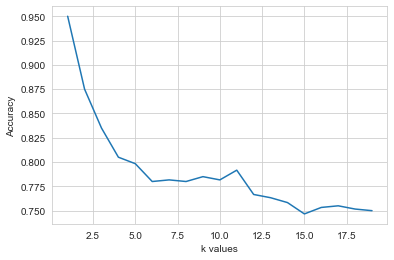

In [39]:
plt.plot(range(1,20),l)
plt.xlabel('k values')
plt.ylabel('Accuracy')

In [40]:
#Thus it can be observed from the above graph that the maximum accuracy is obtained for k=1.
knn=KNeighborsClassifier(n_neighbors=1)

In [41]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [42]:
predict=knn.predict(X_test)
predict

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       395
           1       0.91      0.94      0.93       205

    accuracy                           0.95       600
   macro avg       0.94      0.95      0.94       600
weighted avg       0.95      0.95      0.95       600



In [45]:
print(confusion_matrix(y_test,predict))

[[377  18]
 [ 12 193]]


In [47]:
a=sklearn.metrics.accuracy_score(y_test,predict)
a

0.95

In [ ]:
#Thus the accuracy of prediction of whether a person has diabetes or not is somewhere close to 95%.